# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



Ingrese la velocidad de la moto: 15
Ingrese la aceleración del policía: 3
El instante t en el que la moto y el policía se encuentran es 10.0 segundos


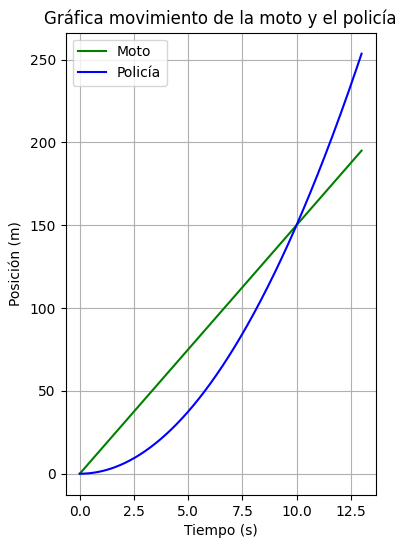

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# El usuario ingresa la velocidad y la aceleración
v_m = float(input("Ingrese la velocidad de la moto: "))
a_p = float(input("Ingrese la aceleración del policía: "))

# Encontrar el momento en el que la moto y el policía se encuentran
instante_t = (2 * v_m) / a_p # Igualar ecuaciones de posición
print(f"El instante t en el que la moto y el policía se encuentran es {instante_t} segundos")

# Crear un arreglo de tiempos desde 0 hasta un poco después del momento de encuentro
t = np.linspace(0, instante_t + 3, 500)
# Usar ecuaciones de movimiento
xf_moto = (v_m * t)
xf_policia = (a_p * (t ** 2)) * 0.5

# Producir la gráfica
plt.figure(figsize=(4,6))
plt.plot(t, xf_moto, label='Moto', color='green')
plt.plot(t, xf_policia, label='Policía', color='blue')
plt.title("Gráfica movimiento de la moto y el policía")
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.legend()
plt.grid()
plt.show()

---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




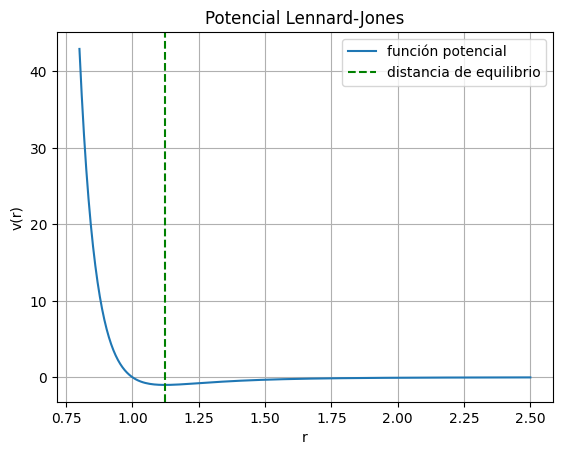

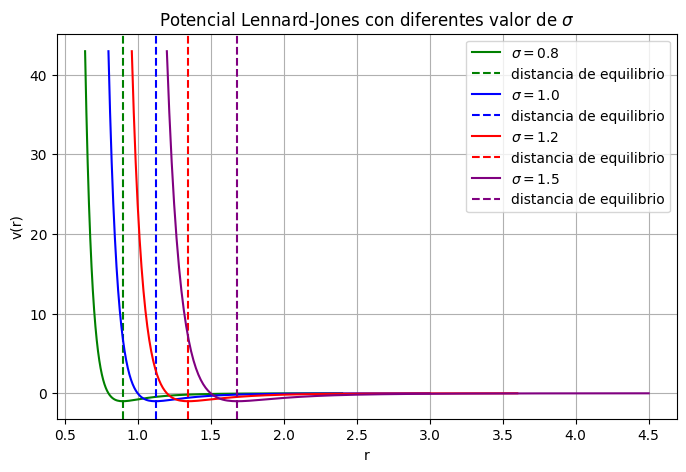

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def potencial(r, epsilon, sigma): # a
  '''
  Definir el potencial Lennard-Jones
  '''
  return 4 * epsilon *(((sigma/r)**12)-((sigma/r)**6))

# b
sigma = 1
epsilon = 1
r_c = 2.5 * sigma
r = np.linspace(0.8, r_c, 200)
v = potencial(r, epsilon, sigma)
r_m = 2**(1/6) * sigma

# Graficar
plt.plot(r, v, label='función potencial')
plt.xlabel('r')
plt.ylabel('v(r)')
plt.title('Potencial Lennard-Jones')
plt.axvline(r_m, color='green', linestyle='--', label='distancia de equilibrio') # Demostrar la distancia de equilibrio
plt.legend()
plt.grid()
plt.show()

# c
plt.figure(figsize=(8, 5))
sigma_valores = [0.8, 1.0, 1.2, 1.5]
colores = ['green', 'blue', 'red', 'purple']
for sigma, color in zip(sigma_valores, colores):
  r_m2 = 2**(1/6) * sigma
  r = np.linspace(0.8 * sigma, 3.0 * sigma, 200)
  V = potencial(r, epsilon, sigma)
  plt.plot(r, V, label= f'$\sigma = {sigma}$',color=color)
  plt.axvline(r_m2, color=color, linestyle='--', label='distancia de equilibrio')

plt.title('Potencial Lennard-Jones con diferentes valor de $\sigma$')
plt.xlabel('r')
plt.ylabel('v(r)')
plt.legend()
plt.grid()
plt.show()

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [ ]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

<Figure size 1300x700 with 0 Axes>

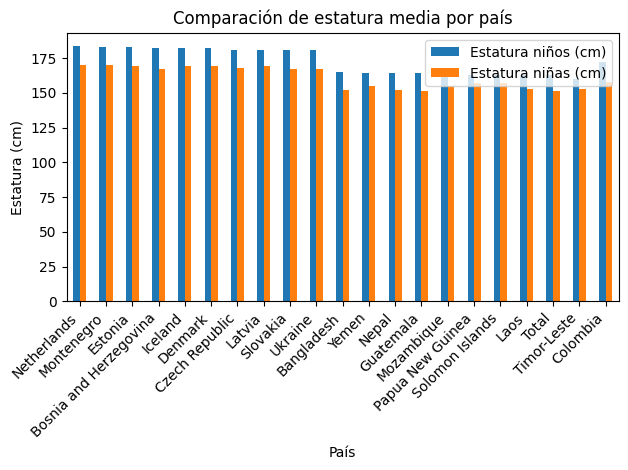

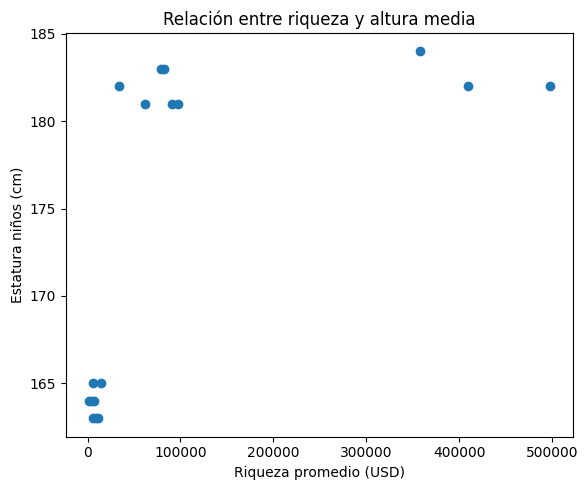

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Leer el dataset de alturas
url_altura = "https://worldpopulationreview.com/country-rankings/average-height-by-country"
alturas = pd.read_html(url_altura)[0]

# Renombrar columnas (español)
alturas = alturas.rename(columns={
    'Country': 'País',
    'Average Height, Boys, 19 yo (cm)↓': 'Estatura niños (cm)',
    'Girls 19 (cm)': 'Estatura niñas (cm)'
})

# Seleccionar solo las columnas necesarias
alturas = alturas[['País', 'Estatura niños (cm)', 'Estatura niñas (cm)']]

# b
alturas_sorted = alturas.sort_values('Estatura niños (cm)', ascending=False)
top10 = alturas_sorted.head(10)
bottom10 = alturas_sorted.tail(10)
colombia = alturas[alturas['País'] == 'Colombia']
barras = pd.concat([top10, bottom10, colombia])

# Graficar
plt.figure(figsize=(13, 7))
barras.plot(x='País', y=['Estatura niños (cm)', 'Estatura niñas (cm)'], kind='bar')
plt.ylabel('Estatura (cm)')
plt.title('Comparación de estatura media por país')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# c
url_income = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"
income = pd.read_html(url_income)[0] # Usar el dataset income
income = income.rename(columns={
    'Country': 'País',
    'Wealth per Adult 2022↓': 'Riqueza (USD)'
})

income = income[['País', 'Riqueza (USD)']]

income['Riqueza (USD)'] = (
    income['Riqueza (USD)']
    .str.replace(r'[\$,]', '', regex=True)
    .str.replace(' ', '')
    .replace('', None)
    .astype(float)
)

# Hacer un merge con el dataset alturas
merged = pd.merge(alturas, income, on='País')
top10_altura = merged.sort_values('Estatura niños (cm)', ascending=False).head(10)
bottom10_altura = merged.sort_values('Estatura niños (cm)').head(10)
datos = pd.concat([top10_altura, bottom10_altura])

datos = datos.dropna(subset=['Riqueza (USD)', 'Estatura niños (cm)'])

# Graficar
plt.figure(figsize=(6, 5))
plt.scatter(datos['Riqueza (USD)'], datos['Estatura niños (cm)'])
plt.xlabel('Riqueza promedio (USD)')
plt.ylabel('Estatura niños (cm)')
plt.title('Relación entre riqueza y altura media')
plt.tight_layout()
plt.show()